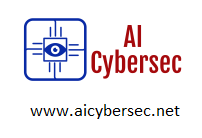

## 1. Linear Regression

In [41]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [42]:
# Importing the dataset
dataset = pd.read_csv('d:/data/data/salary.csv',header=0) # header=0 : name of the columns in the first raw

In [43]:
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [8]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [9]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [12]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.7, random_state = 0)

In [13]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

In [14]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [16]:
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [17]:
y_test

array([ 37731, 122391,  57081,  63218, 116969, 109431, 112635,  55794,
        83088, 101302], dtype=int64)

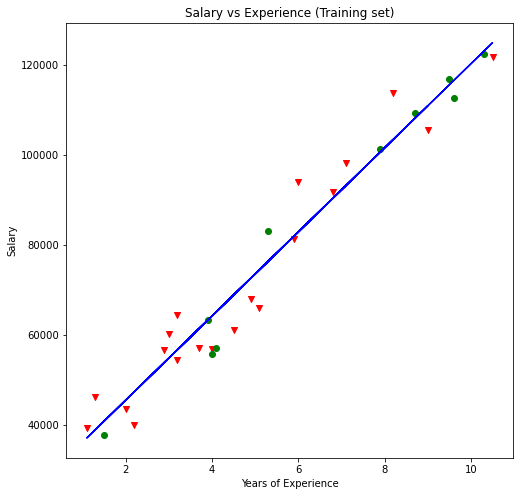

In [30]:
# Visualising the Training set results

plt.figure(figsize=(8, 8))

# Train
plt.scatter(X_train, y_train, color = 'red', marker='v')

# Test (predicted) 
plt.scatter(X_test, y_test, color = 'green')

plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## 2. SLR, score, a & b regression, RMSE

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [25]:
%matplotlib inline 

In [26]:
lm = linear_model.LinearRegression()

X = dataset[["YearsExperience"]]
y = dataset[['Salary']]

model = lm.fit(X, y)

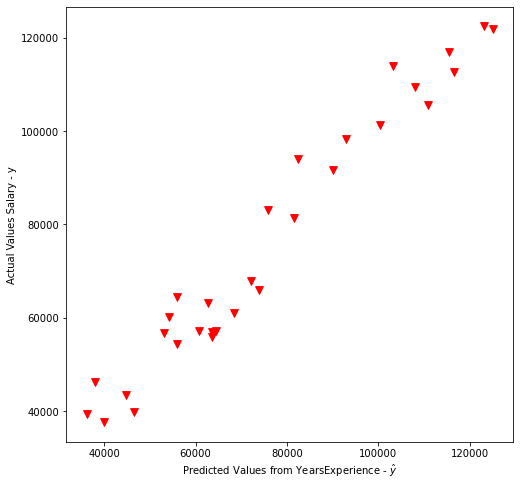

score:  0.9569566641435086


In [27]:
predictions  =  model.predict(X)
score        =  model.score(X, y)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=60, c='r', marker='v',zorder=10)
plt.xlabel("Predicted Values from YearsExperience - $\hat{y}$")
plt.ylabel("Actual Values Salary - y")
plt.show()

print ("score: ", score)

In [28]:
print (model.coef_)
print (model.intercept_)

[[9449.96232146]]
[25792.20019867]


In [29]:
from sklearn.metrics import mean_squared_error

print (np.sqrt(mean_squared_error(y, predictions)))

5592.043608760662


In [ ]:
################################################################################################################################

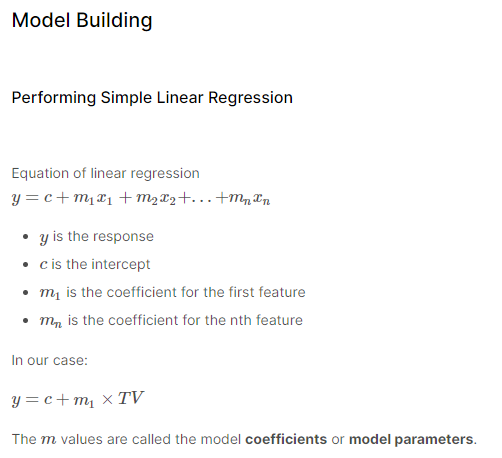

## 3. Multiple Linear regression example using scikit-learn

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import linear_model

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

In [20]:
# Load the Boston House prices dataset from python

#boston = datasets.load_boston()
#X = boston.data
#y = boston.target

In [59]:
# Load the Boston House prices dataset from the data provided

dat = read_csv('D:/data/data/housingboston.csv', names=column_names,header=None, delimiter=r"\s+")

In [60]:
dat.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


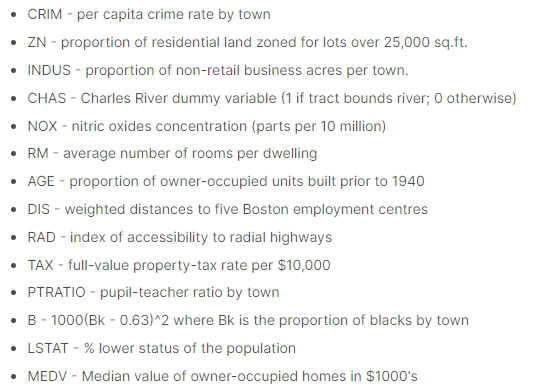

In [23]:
#print(boston.keys())

# data: contains the information for various houses
# target: prices of the house
# feature_names: names of the features
# DESCR: describes the dataset

In [61]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.5,random_state = 0)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Xtrain, ytrain)

# Make predictions using the testing set
ypred = regr.predict(Xtest)

In [62]:
# The coefficients
print('Coefficients: \n', regr.coef_)

#Intercept
print('Intercept: \n', regr.intercept_ )

# The mean absolute error
print("MAE = %5.3f" % mean_absolute_error(ytest, ypred))

# Explained variance score: 1 is perfect prediction
print("R^2 = %0.5f" % r2_score(ytest, ypred))

# The mean squared error
print("MSE = %5.3f" % mean_squared_error(ytest, ypred))

Coefficients: 
 [-1.22697052e-01  5.76835439e-02  7.42047961e-02  3.38949970e+00
 -1.65391519e+01  3.57730248e+00 -2.98033902e-03 -1.55759520e+00
  2.50098217e-01 -9.73850155e-03 -1.12527834e+00  6.85073312e-03
 -5.92410460e-01]
Intercept: 
 41.586076830994706
MAE = 3.628
R^2 = 0.66627
MSE = 25.302


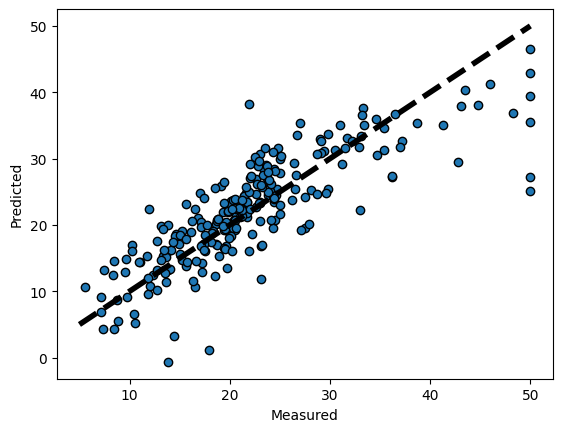

In [63]:
# Plot outputs
fig, ax = plt.subplots()

ax.scatter(ytest, ypred, edgecolors = (0, 0, 0))

ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw = 4)

ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

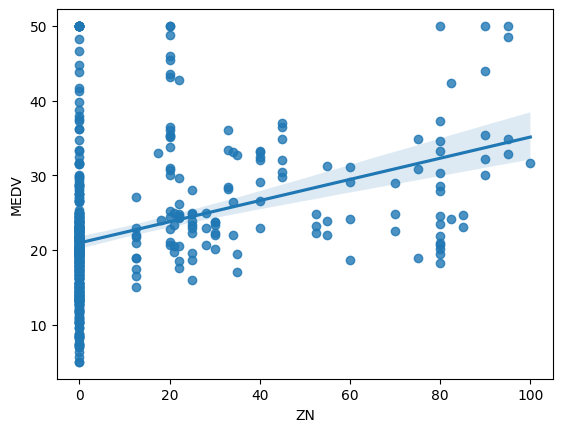

In [66]:
# example MEDV vs ZN

ax = sns.regplot(x="ZN", y="MEDV", data=dat)

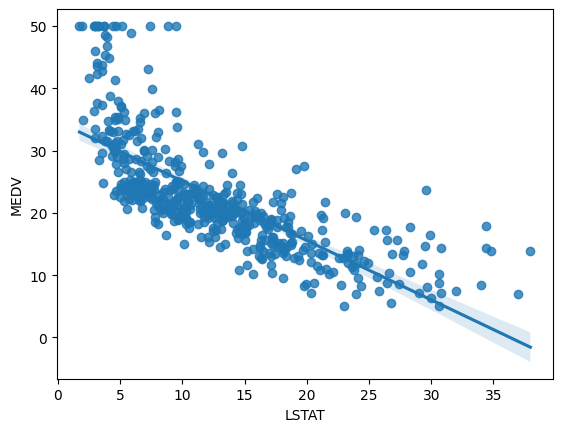

In [67]:
# example MEDV vs ZN

ax = sns.regplot(x="LSTAT", y="MEDV", data=dat)